# PROCESAMIENTO TWEETS

In [99]:
# -*- coding: utf-8 -*-
import re
import pandas as pd
import numpy as np
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer # para realizar el steemer
from sklearn.cluster import KMeans 
#importamos la libreria que realizara los grupos
import matplotlib.pyplot as plt
%matplotlib inline 
datos = pd.read_csv('DebateFinal.csv', header = 0)

In [4]:
tweets = datos['tweet']
tweets = list(tweets.ix[0:2999])
print(len(tweets))
#reviso el tipo de dato de un tweet
print(type(tweets[0]))

3000
<class 'str'>


In [3]:
print(tweets[0])
print(tweets[1])


#LeySeca #DebateFinal #ColombiaDecide #EleccionesColombia #Elecciones2018 #EleccionesPresidenciales2018 Huila: la jornada en cifrasPuestos de votación 215Mesas 2.178Personas habilitadas para sufragar 817.464Jurados de votación 14.475 Y más en ....  https://goo.gl/JDxHHG 
Retweeted Lorena <Emoji: Victory hand><Emoji: Victory hand> (@lorenita_sua):Si Duque va a desmantelar el crimen organizado, va acabar entonces con el Centro Democrático? #DebateFinal


In [53]:
tw = tweets[1]
w = re.sub('(http(s?)://)(w{3})(\.\w+)(\.(\w{3})(\.\w{2})?)(/.*)?(\s)|(<.*>)',' ',tw)
w = re.sub('(http(s?)://)?(\w+\.)?(\w+\.\w{3}(/.+)?)',' ',w)
x = re.sub('[^a-zA-Zóáéíúñ]|https|goo|gl',' ',w)

'retweeted lorena     lorenita sua  si duque va a desmantelar el crimen organizado  va acabar entonces con el centro democrático   debatefinal'

In [74]:
print(tw)
print(x.lower())

Fin del conversatorio.... perdón perdón perdón del #DebateFinal en #ColombiaDecide ... sensatez y precisión es lo que hace marcar la cara a @petrogustavo con su formula @angelamrobledo ... @sergio_fajardo me gusta tu forma de pensar pero me quedo con el primero.
fin del conversatorio     perdón perdón perdón del  debatefinal en  colombiadecide     sensatez y precisión es lo que hace marcar la cara a  petrogustavo con su formula  angelamrobledo      sergio fajardo me gusta tu forma de pensar pero me quedo con el primero 


In [100]:
twtsPreproce = []
stemmer = SnowballStemmer("spanish")
stopwords2 = ('http','debate','caribe','youtube','be','youtu','https')
#ahora limpiamos todos los tweets
for tw in tweets:
    w = re.sub('(http(s?)://)(w{3})(\.\w+)(\.(\w{3})(\.\w{2})?)(/.*)?(\s)|(<.*>)',' ',tw)
    w = re.sub('(http(s?)://)?(\w+\.)?(\w+\.\w{3}(/.+)?)',' ',w).lower()
    x = re.sub('[^a-zA-Zóáéíúñ]|https|goo|gl',' ',w).split(' ')
    l = [stemmer.stem(word) for word in x if (not word in set(stopwords.words('spanish'))) and (not word in stopwords2) and word != '']
    twtsPreproce.append(l)
    

In [116]:
print(twtsPreproce[120])

[]


In [102]:
BagOfWords = []
for e in twtsPreproce:
    BagOfWords = BagOfWords + e

len(BagOfWords)
BagOfWords = set(BagOfWords)
BagOfWords = list(BagOfWords) # lo vuelvo lista para poder utilizar el index
len(BagOfWords)#obtenemos las dimensiones para el agrupamiento

6102

In [117]:
twlimpios = []
for e in twtsPreproce:
    twlimpios.append(' '.join(e))

print(twlimpios[15])

hag esfuerz pas segund vuelt mejor dej dec vot men mal dig unison gan mejor debatefinal colombiadecid


In [106]:
#ahora tokenizamos los tweets para hacer una lemantización y poder crear las bolsas de palabras
twlmtoken =[nltk.word_tokenize(sentence) for sentence in twlimpios]

In [135]:
nltk.FreqDist(twlmtoken[0])

FreqDist({'cifraspuest': 1,
          'colombiadecid': 1,
          'debatefinal': 1,
          'eleccion': 1,
          'eleccionescolombi': 1,
          'eleccionespresidencial': 1,
          'habilit': 1,
          'huil': 1,
          'jdxhhg': 1,
          'jorn': 1,
          'jur': 1,
          'leysec': 1,
          'mes': 1,
          'person': 1,
          'sufrag': 1,
          'votacion': 2})

In [121]:
tablaFreq = [nltk.FreqDist(text) for text in twlmtoken ]

In [128]:
tablaFreq[0].keys()

dict_keys(['leysec', 'cifraspuest', 'eleccion', 'votacion', 'eleccionespresidencial', 'huil', 'sufrag', 'person', 'jorn', 'colombiadecid', 'debatefinal', 'mes', 'habilit', 'jur', 'jdxhhg', 'eleccionescolombi'])

# SE CREARA UN ESPACIO VECTORIAL DE CADA TWEET CON LAS PALABRAS PARA PODER AGRUPAR

In [131]:
NroTweets = len(tweets)
Dimensiones = len(BagOfWords)
Espacio = np.zeros((NroTweets, Dimensiones))
print(Espacio)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [136]:
for i in range(NroTweets): #recorremos tweets por tweets actualizando sus dimensiones
    for wd in tablaFreq[i].keys():
        j = BagOfWords.index(wd)
        Espacio[i][j] = tablaFreq[i][wd]



### vamos a agrupar usando kmeans pero antes, calcularemos un k adecuado

In [137]:

#vamos a calcular cual es mejor numero de cluster para crear dentro del modelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, precompute_distances= False)
    kmeans.fit(Espacio)
    wcss.append(kmeans.inertia_)


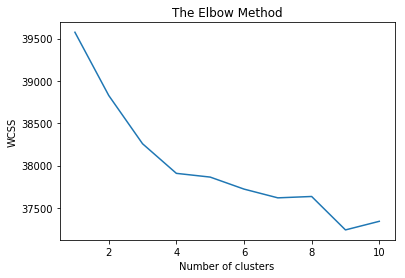

In [138]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [154]:
kmeans = KMeans(n_clusters = 9 ,random_state = 42, precompute_distances = False).fit(Espacio)
y_kmeans = kmeans.fit_predict(Espacio)

In [155]:
print("Cantidad de grupos existentes: ",len(set(kmeans.labels_)))
print("Cantidad de tweets: ", len(kmeans.labels_))
print("Grupo del primer Tweet: ",kmeans.labels_[0])

Cantidad de grupos existentes:  9
Cantidad de tweets:  3000
Grupo del primer Tweet:  3


In [156]:
print(kmeans)
print(y_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=1, precompute_distances=False,
    random_state=42, tol=0.0001, verbose=0)
[3 5 5 ... 1 3 7]


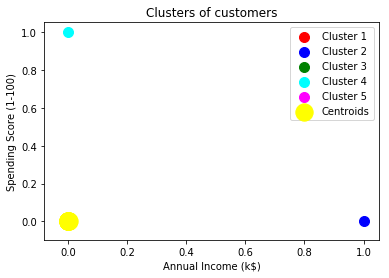

In [168]:

# Visualising the clusters
plt.scatter(Espacio[y_kmeans == 0, 0], Espacio[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Espacio[y_kmeans == 1, 0], Espacio[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Espacio[y_kmeans == 2, 0], Espacio[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Espacio[y_kmeans == 3, 0], Espacio[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(Espacio[y_kmeans == 4, 0], Espacio[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [172]:
l = [0]*9
for e in y_kmeans:
    l[e] += 1
    

In [173]:
print(l)

[68, 348, 66, 641, 1, 1291, 1, 281, 303]
